In [227]:
# import all needed libraries
import matplotlib.pyplot as plt
import math
import pandas

In [229]:

def importCones():
    # import the data from the coens generated in excel
    contents = pandas.read_csv("cones.csv", sep= ",", header=None).values

    maxY = len(contents)
    # print(contents)
    # setup a list to store the cones
    cones = []
    for y, row in enumerate(contents):
        for x, val in enumerate(row):
            if isinstance(val, str):
                # check if the car position has been given
                if val == "c":
                    # add the car position with x, y
                    car = [(x+1), (maxY-y), val]
                else:
                    # add the cone with x, y and its colour
                    cones.append([(x+1), (maxY-y), val])
                    # print(x+1,maxY-y, val)
        # print(i, row)
    # print(cones)
    return cones, car

In [230]:

def calcMids(cones, carPos):
	# setup a list to store the midpoints
	midPoints = []
	# split the cones up into red and blue
	redCones, blueCones = coneSetup(cones, carPos)
	# go through all the red cones
	for rCone in redCones:
		for bCone in blueCones:
			# find the distance between the two cones (cone distance)
			cd = findDisPoints(rCone, bCone)
			# check if they are in the suitable range
			if cd < 5:
				midPoint = findMidPoint(rCone, bCone)

				# add the distance between the midpoint and the car (car to midpoint distance)
				c2md = findDisPoints(midPoint, carPos)
				# add that to the midpoint data (so that it can be sorted)
				midPoint.append(c2md)

				# add the new midpoint to the list of midpoints
				midPoints.append(midPoint)
	
	# order the midpoints from closest to furthest
	midPoints = sorted(midPoints, key = lambda midPoint: midPoint[3])

	# return the midpoints calculated
	return midPoints


In [231]:

def coneSetup(cones, carPos):
	# setup lists of red and blue cones to fill up
	redCones = []
	blueCones = []
	for cone in cones:
		# find the distance between the car and cone
		distance = findDisPoints(cone, carPos)

		# if cones is red and in range
		if cone[2] == 'r' and distance < 15:
			# add distnace to the cone data
			cone.append(distance)
			# add cone to the red list
			redCones.append(cone)
		# if coen is blue and in range
		elif cone[2] == 'b' and distance < 15:
			# add distance to the cone data
			cone.append(distance)
			# add cone to the blue list
			blueCones.append(cone)

	# return the lists of red and blue cones
	return redCones, blueCones


In [232]:

def findDisPoints(point1, point2):
	# work out the distance between two points using the maths library
	distance = math.hypot(point2[0] - point1[0], point2[1] - point1[1])
	return distance


In [233]:

def findMidPoint(point1, point2):
	midPoint = []
	midPoint.append((point1[0]+point2[0])/2) # x coordinate
	midPoint.append((point1[1]+point2[1])/2) # y coordinate
	return midPoint + ['m']


In [234]:

def displayMap(pointMap):
	# add a grid
	plt.grid(visible = True, which = 'major', axis = 'both', alpha = 0.2)
	for point in pointMap:
		# get parameters from point
		x = float(point[0])
		y = float(point[1])
		if point[2] == "r":
			colour = "red"
			mark = 'o'
		elif point[2] == "b":
			colour = "blue"
			mark = 'o'
		elif point[2] == "c":
			colour = "green"
			mark = 'x'
		else:
			colour = "orange"
			mark = 'x'
		# plot the point into the map
		plt.scatter(x, y, marker=mark, color=colour)
	# display the map generated
	plt.show()


In [235]:
def startup():
	# there are two possible configurations that we will be given
	# [x, y] in list (BASED ON THIS FOR NOW)
	# or list of [x] followed by [y]

	# using a file to generate the points
	txtMidPoints = open("midPoints.txt", "r")
	ls = txtMidPoints.readlines()
	cones = []
	for line in ls:
		xy = line.strip("\n")
		point = xy.split(",")
		cones.append([float(point[0]), float(point[1]), point[2]])
	txtMidPoints.close()
	return cones


Cones: [[10, 27, 'r'], [14, 27, 'b'], [9, 25, 'r'], [8, 22, 'r'], [13, 22, 'b'], [6, 19, 'r'], [12, 19, 'b'], [11, 16, 'b'], [5, 15, 'r'], [9, 14, 'b'], [3, 12, 'r'], [7, 11, 'b'], [2, 10, 'r'], [6, 8, 'b'], [1, 7, 'r'], [5, 6, 'b'], [1, 3, 'r'], [5, 3, 'b']]

Car Position: [3, 1, 'c']

Midpoints: [[3.0, 3.0, 'm', 2.0], [3.0, 6.5, 'm', 5.5], [4.0, 9.0, 'm', 8.06225774829855], [5.0, 11.5, 'm', 10.688779163215974], [6.0, 13.0, 'm', 12.36931687685298], [7.0, 14.5, 'm', 14.080127840328723]]

Amount of midpoints: 6


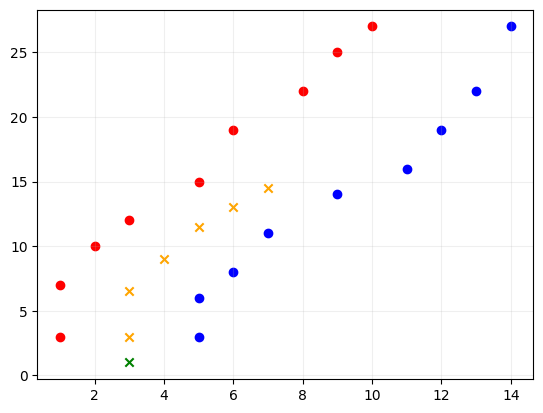

In [239]:
### MAIN
# get the position of the cones from the text file
# conesLs = startup()
conesLs, carPos = importCones()
# display the cones and car position
print("Cones:", conesLs)
print("\nCar Position:", carPos)

# calculate the midpoints from the cones and car position
midPoints = calcMids(conesLs, carPos)

# display all the midpoints calculated
print("\nMidpoints:", midPoints)
print("\nAmount of midpoints:", len(midPoints))

# display the outputs in a graph
allPoints = conesLs + midPoints + [carPos]
displayMap(allPoints)